# Introduction
The project aims to develop a text classification model for Uber Eats reviews, enhancing customer satisfaction by categorizing sentiments as positive, negative, or neutral. With a surge in low ratings threatening its reputation, Uber Eats seeks strategic improvements to address issues with app functionality, food quality, and service standards. By systematically analyzing Reviews, the proposed model offers vital insights into customer sentiments, enabling targeted enhancements to maintain competitiveness amidst fierce industry rivalry with Deliveroo and Grab.



# Dataset
The project leverages multiple datasets, including Google Playstore, Consumer Affairs, Trust Pilot, Product Review, and Sitejabber. These diverse sources provide a comprehensive range of customer feedback on Uber Eats, offering insights into various aspects of user experience and satisfaction. By aggregating data from these platforms, the text classification model gains a robust understanding of customer sentiments, facilitating targeted improvements to enhance service quality.


<a id='table_of_contents'></a>

1. [Import libraries](#imports)
2. [Import data](#import_data)
3. [Data exploration](#data_exploration)
4. [Data cleaning and preparation](#data_cleaning)
5. [Model training](#model_training)<br>
6. [Tuning](#tuning)<br>
7. [Validation](#validation)<br>

# 1. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import ast
from dateutil import parser
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.utils import to_categorical
from keras.utils import to_categorical


import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [32]:
df = pd.read_csv('cleaned_data.csv')
df

,stars,cleaned_text,sentiment
0,1,"['lately', 'common', 'wait', 'hour', 'food', '...",negative
1,5,"['love', 'great', 'offer', 'good', 'selection'...",positive
2,1,"['disappointed', 'app', 'used', 'long', 'time'...",negative
3,2,"['fairly', 'easy', 'use', 'trying', 'find', 'h...",negative
4,4,"['like', 'fact', 'u', 'ca', 'get', 'refund', '...",positive
...,...,...,...
8892,5,"['food', 'good', 'delivery', 'took', 'forever'...",positive
8893,1,"['whenever', 'never', 'sent', 'correct', 'item...",negative
8894,1,"['delivery', 'driver', 'turn', 'incorrect', 'l...",negative
8895,5,"['great', 'deal', 'buddy', 'pizza', 'buy', 'on...",positive


# 3. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

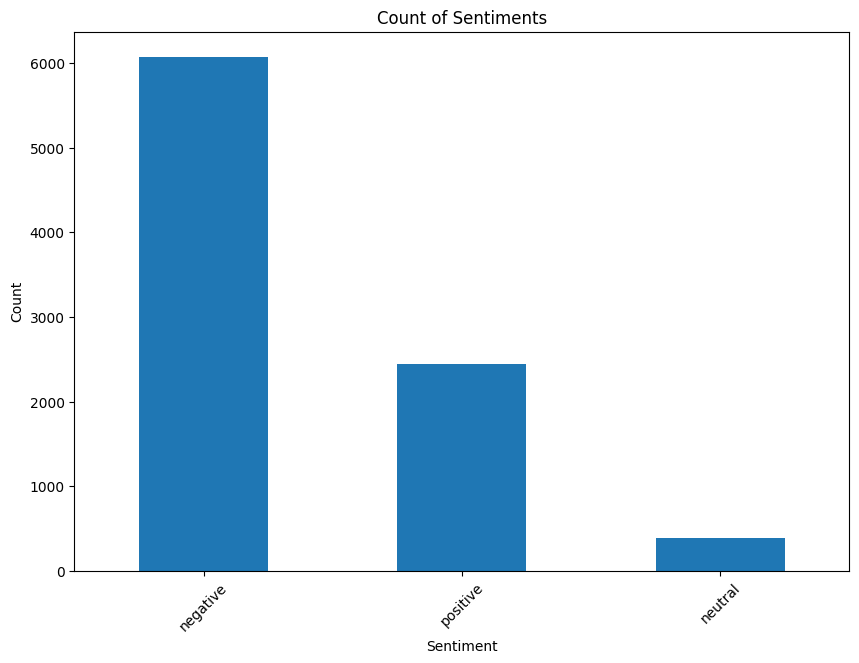

In [33]:
# Count the number of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot bar chart
sentiment_counts.plot(kind='bar', figsize=(10,7))

plt.title('Count of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Data cleaning and preparation <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [34]:
#  convert string representations of lists in 'cleaned_text' back to actual lists
df['cleaned_text_list'] = df['cleaned_text'].apply(ast.literal_eval)

# convert lists in 'cleaned_text_list' to strings
df['cleaned_text_str'] = df['cleaned_text_list'].apply(' '.join)

In [35]:
# initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [36]:
# convert 'cleaned_text_str' into TF-IDF vectors
X = vectorizer.fit_transform(df['cleaned_text_str'])

# use 'sentiment' as target
y = df['sentiment']

In [37]:
# Define oversampling strategy
over = RandomOverSampler(sampling_strategy='auto')

# Fit and apply the transform
X_over, y_over = over.fit_resample(X, y)

# Define undersampling strategy
under = RandomUnderSampler(sampling_strategy='auto')

# Fit and apply the transform
X_under, y_under = under.fit_resample(X, y)

# 5. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

In [38]:
# split the oversampled data into training and test sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [39]:
# split the undersampled data into training and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

## Logistic Regression

In [40]:
# initialize and train the Logistic Regression model on the oversampled data
lr_model_over = LogisticRegression()
lr_model_over.fit(X_train_over, y_train_over)

# make predictions on the test set
y_pred_over = lr_model_over.predict(X_test_over)

# print classification report for the oversampled data
print("Logistic Regression Metrics for Oversampled Data:")
print(classification_report(y_test_over, y_pred_over))

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))

Logistic Regression Metrics for Oversampled Data:
              precision    recall  f1-score   support

    negative       0.95      0.90      0.92      1209
     neutral       0.92      1.00      0.96      1238
    positive       0.95      0.92      0.94      1194

    accuracy                           0.94      3641
   macro avg       0.94      0.94      0.94      3641
weighted avg       0.94      0.94      0.94      3641


Accuracy:  0.9393023894534469

Precision:  0.9401773276185437

Recall:  0.9393023894534469

F1 Score:  0.9389018265690212


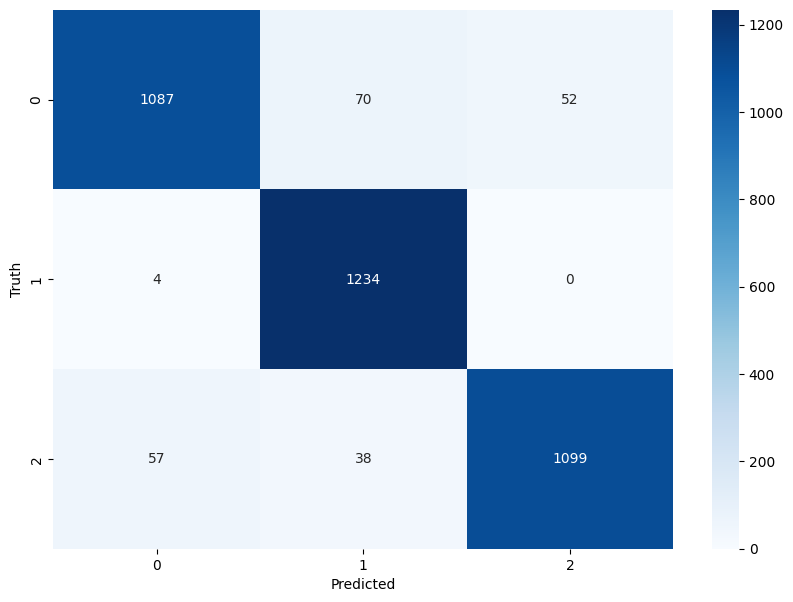

In [41]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_over, y_pred_over)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [42]:
# initialize and train the Logistic Regression model on the undersampled data
lr_model_under = LogisticRegression()
lr_model_under.fit(X_train_under, y_train_under)

# make predictions on the test set
y_pred_under = lr_model_under.predict(X_test_under)

# print classification report for the undersampled data
print("\nLogistic Regression Metrics for Undersampled Data:")
print(classification_report(y_test_under, y_pred_under))


Logistic Regression Metrics for Undersampled Data:
              precision    recall  f1-score   support

    negative       0.79      0.79      0.79        84
     neutral       0.64      0.62      0.63        77
    positive       0.83      0.85      0.84        73

    accuracy                           0.75       234
   macro avg       0.75      0.75      0.75       234
weighted avg       0.75      0.75      0.75       234



In [43]:
# make predictions on the test set for undersampled data
y_pred_under = lr_model_under.predict(X_test_under)

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_under, y_pred_under))

# print precision
print("\nPrecision: ", precision_score(y_test_under, y_pred_under, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_under, y_pred_under, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_under, y_pred_under, average='weighted'))


Accuracy:  0.7521367521367521

Precision:  0.7505413105413106

Recall:  0.7521367521367521

F1 Score:  0.7512553038868828


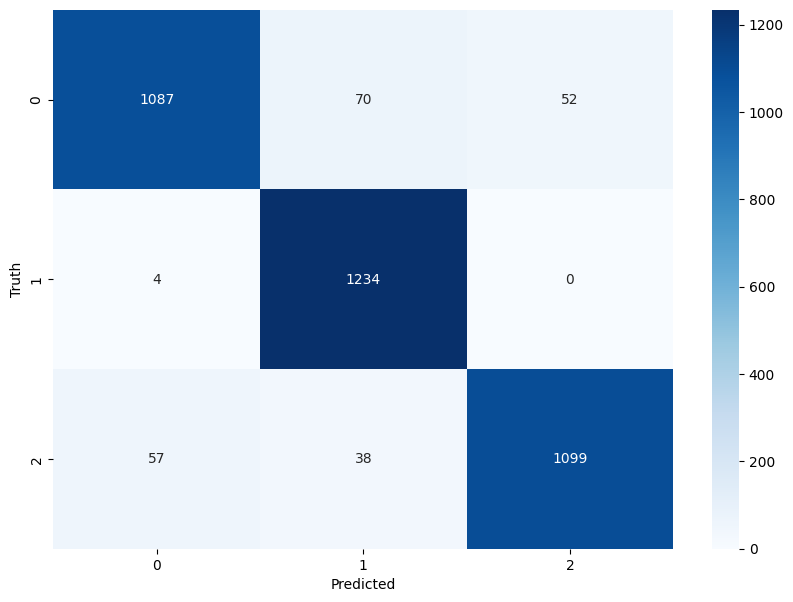

In [44]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_over, y_pred_over)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Here are some reasons why the above has happend

Loss of Information: When you undersample, you're essentially discarding potentially useful information. The randomly removed instances from the majority class could contain important information that the model needs to correctly classify new instances.

Overfitting: If the minority class is very small compared to the majority class, undersampling can lead to overfitting. The model trained on the undersampled dataset might not generalize well to new, unseen data.

Representation: The undersampled dataset may not adequately represent the majority class, especially if the class is not homogeneous. This can lead to a model that performs poorly on the majority class.

# Naives Bayes Models
### Gaussian Naive Bayes Model

In [45]:
# initialize and train the Gaussian Naive Bayes model on the oversampled data
nb_model_over = GaussianNB()
nb_model_over.fit(X_train_over.toarray(), y_train_over)

GaussianNB()

In [46]:
# make predictions on the test set
y_pred_over = nb_model_over.predict(X_test_over.toarray())

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))

# print classification report for the oversampled data
print("Gaussian Naive Bayes Model Metrics for Oversampled Data:")
print(classification_report(y_test_over, y_pred_over))


Accuracy:  0.78687173853337

Precision:  0.8166727122444248

Recall:  0.78687173853337

F1 Score:  0.782476824797581
Gaussian Naive Bayes Model Metrics for Oversampled Data:
              precision    recall  f1-score   support

    negative       0.95      0.75      0.84      1209
     neutral       0.69      1.00      0.81      1238
    positive       0.82      0.60      0.69      1194

    accuracy                           0.79      3641
   macro avg       0.82      0.78      0.78      3641
weighted avg       0.82      0.79      0.78      3641



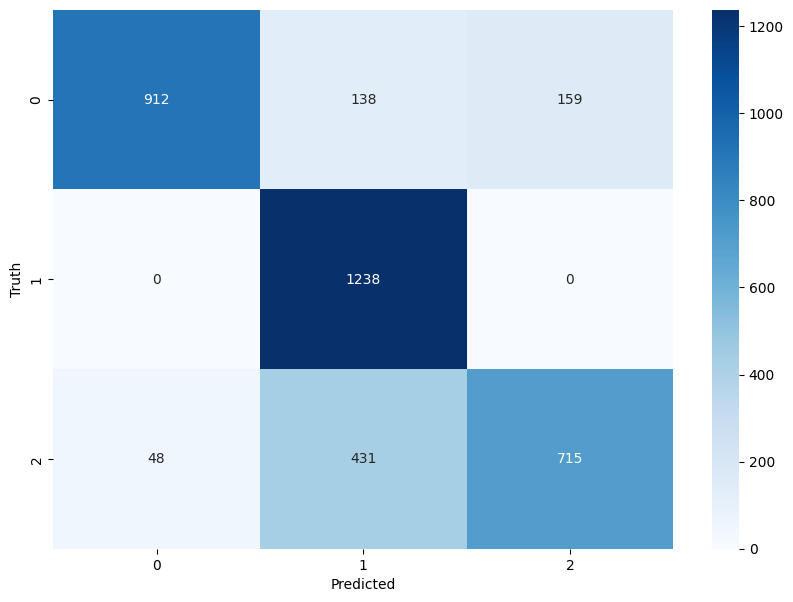

In [47]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_over, y_pred_over)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Multinomial Naive Bayes Model

In [48]:
# initialize and train the Multinomial Naive Bayes model on the oversampled data
mnb_model_over = MultinomialNB()
mnb_model_over.fit(X_train_over, y_train_over)

MultinomialNB()

In [49]:
# make predictions on the test set
y_pred_over = mnb_model_over.predict(X_test_over)

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))

print("Multinomial Naive Bayes Model Metrics for Oversampled Data:")
print(classification_report(y_test_over, y_pred_over))


Accuracy:  0.889865421587476

Precision:  0.8949913647242619

Recall:  0.889865421587476

F1 Score:  0.8900705093088228
Multinomial Naive Bayes Model Metrics for Oversampled Data:
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      1209
     neutral       0.83      0.94      0.89      1238
    positive       0.96      0.84      0.89      1194

    accuracy                           0.89      3641
   macro avg       0.90      0.89      0.89      3641
weighted avg       0.89      0.89      0.89      3641



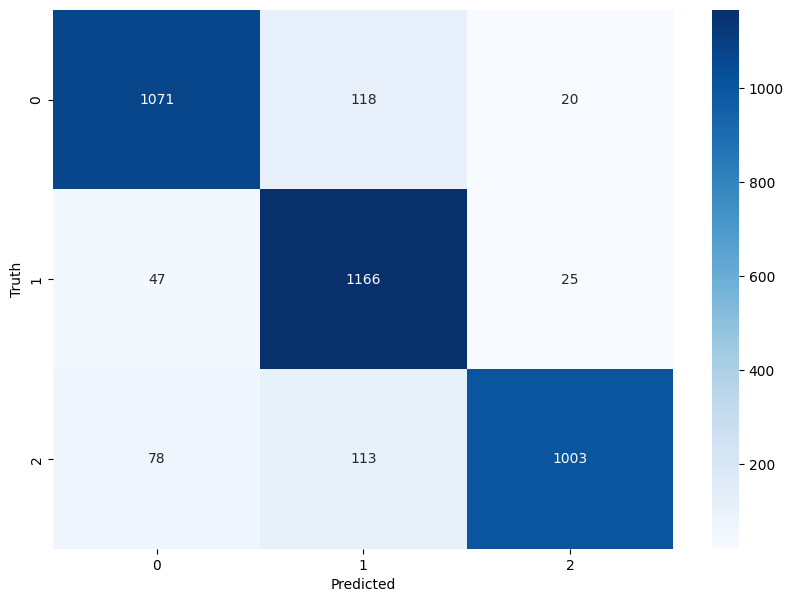

In [50]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_over, y_pred_over)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Bernoulli Naive Bayes Model

In [51]:
# initialize and train the Bernoulli Naive Bayes model on the oversampled data
bnb_model_over = BernoulliNB()
bnb_model_over.fit(X_train_over, y_train_over)

BernoulliNB()

In [52]:
# make predictions on the test set
y_pred_over = bnb_model_over.predict(X_test_over)

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))

print("Bernoulli Naive Bayes Model Metrics for Oversampled Data:")
print(classification_report(y_test_over, y_pred_over))


Accuracy:  0.8228508651469376

Precision:  0.8316682498970446

Recall:  0.8228508651469376

F1 Score:  0.8232486848519638
Bernoulli Naive Bayes Model Metrics for Oversampled Data:
              precision    recall  f1-score   support

    negative       0.90      0.77      0.83      1209
     neutral       0.84      0.81      0.82      1238
    positive       0.75      0.89      0.82      1194

    accuracy                           0.82      3641
   macro avg       0.83      0.82      0.82      3641
weighted avg       0.83      0.82      0.82      3641



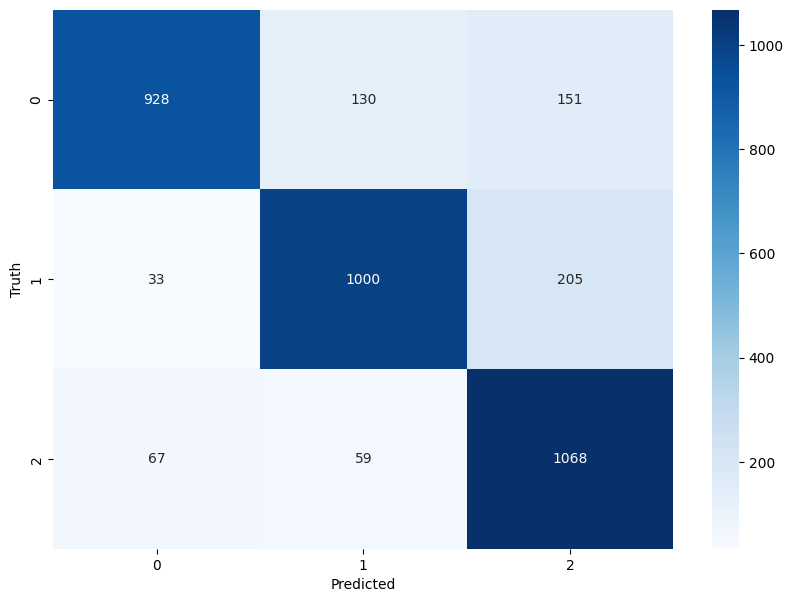

In [53]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_over, y_pred_over)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## SVM Model

In [54]:
# initialize and train the SVM model on the oversampled data
svm_model_over = SVC(probability=True)
svm_model_over.fit(X_train_over, y_train_over)

SVC(probability=True)

In [55]:
# make predictions on the test set
y_pred_over = svm_model_over.predict(X_test_over)

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))

print("SVM Model Metrics for Oversampled Data:")
print(classification_report(y_test_over, y_pred_over))


Accuracy:  0.9774787146388355

Precision:  0.9775173922216789

Recall:  0.9774787146388355

F1 Score:  0.9774713907527018
SVM Model Metrics for Oversampled Data:
              precision    recall  f1-score   support

    negative       0.96      0.97      0.97      1209
     neutral       1.00      1.00      1.00      1238
    positive       0.97      0.96      0.97      1194

    accuracy                           0.98      3641
   macro avg       0.98      0.98      0.98      3641
weighted avg       0.98      0.98      0.98      3641



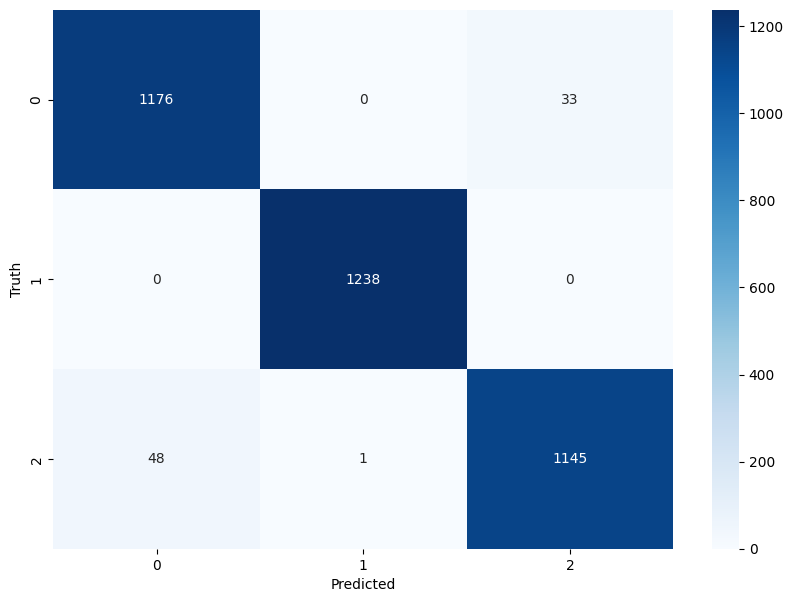

In [56]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_over, y_pred_over)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Decision Tree Model

In [57]:
# initialize and train the Decision Tree model on the oversampled data
dt_model_over = DecisionTreeClassifier()
dt_model_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [58]:
# make predictions on the test set
y_pred_over = dt_model_over.predict(X_test_over)

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))

print("Decision Tree Model Metrics for Oversampled Data:")
print(classification_report(y_test_over, y_pred_over))


Accuracy:  0.9244712990936556

Precision:  0.9264765760957313

Recall:  0.9244712990936556

F1 Score:  0.9231850434586598
Decision Tree Model Metrics for Oversampled Data:
              precision    recall  f1-score   support

    negative       0.96      0.83      0.89      1209
     neutral       0.93      1.00      0.96      1238
    positive       0.89      0.94      0.92      1194

    accuracy                           0.92      3641
   macro avg       0.93      0.92      0.92      3641
weighted avg       0.93      0.92      0.92      3641



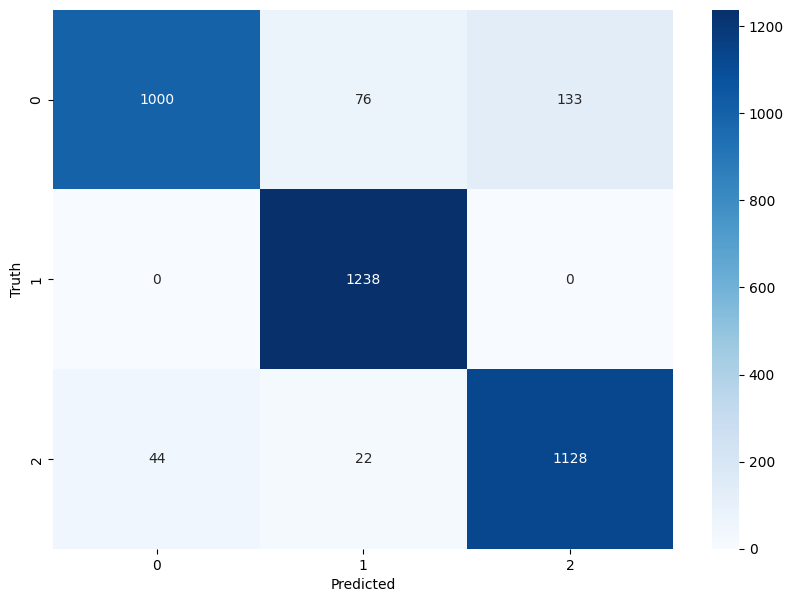

In [59]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_over, y_pred_over)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Random Forest Model

In [60]:
# initialize and train the Random Forest model on the oversampled data
rf_model_over = RandomForestClassifier()
rf_model_over.fit(X_train_over, y_train_over)

RandomForestClassifier()

In [61]:
# make predictions on the test set
y_pred_over = rf_model_over.predict(X_test_over)

# print accuracy
print("\nAccuracy: ", accuracy_score(y_test_over, y_pred_over))

# print precision
print("\nPrecision: ", precision_score(y_test_over, y_pred_over, average='weighted'))

# print recall
print("\nRecall: ", recall_score(y_test_over, y_pred_over, average='weighted'))

# print F1 score
print("\nF1 Score: ", f1_score(y_test_over, y_pred_over, average='weighted'))

print("Random Forest Model Metrics for Oversampled Data:")
print(classification_report(y_test_over, y_pred_over))


Accuracy:  0.9769294149958803

Precision:  0.9769332961923128

Recall:  0.9769294149958803

F1 Score:  0.9769295907934401
Random Forest Model Metrics for Oversampled Data:
              precision    recall  f1-score   support

    negative       0.97      0.96      0.97      1209
     neutral       1.00      1.00      1.00      1238
    positive       0.96      0.97      0.96      1194

    accuracy                           0.98      3641
   macro avg       0.98      0.98      0.98      3641
weighted avg       0.98      0.98      0.98      3641



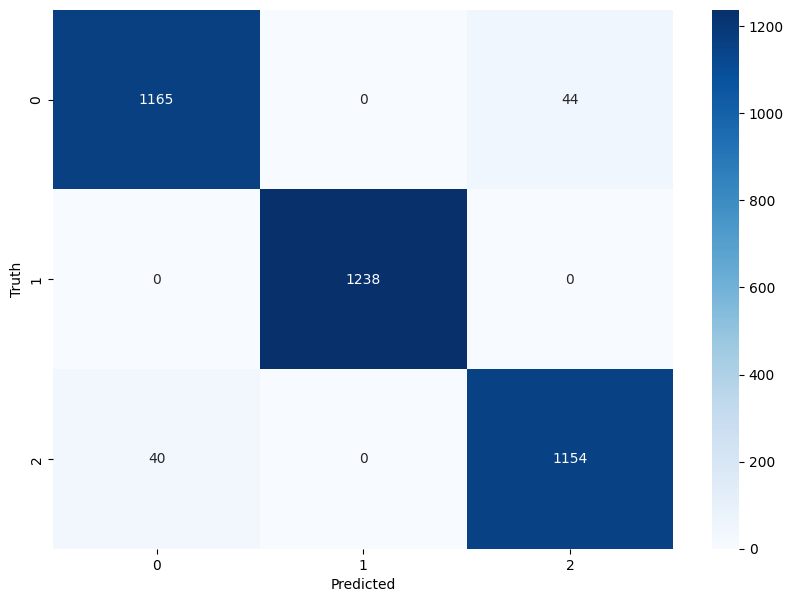

In [62]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_over, y_pred_over)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Vader Sentiment Analysis

In [27]:
# Initialize the sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

In [28]:
# Define a function to get the sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

In [29]:
# Apply the function to the 'review text' column
df['sentiment_scores'] = df['cleaned_text_str'].apply(get_sentiment_scores)

In [30]:
# Split the sentiment scores into separate columns
df = pd.concat([df.drop(['sentiment_scores'], axis=1), df['sentiment_scores'].apply(pd.Series)], axis=1)
df.head(10)

,stars,cleaned_text,sentiment,cleaned_text_list,cleaned_text_str,neg,neu,pos,compound
0,1,"['lately', 'common', 'wait', 'hour', 'food', '...",negative,"[lately, common, wait, hour, food, passed, dri...",lately common wait hour food passed driver one...,0.231,0.660,0.108,-0.6369
1,5,"['love', 'great', 'offer', 'good', 'selection'...",positive,"[love, great, offer, good, selection, food, sh...",love great offer good selection food shopping ...,0.095,0.536,0.370,0.9468
2,1,"['disappointed', 'app', 'used', 'long', 'time'...",negative,"[disappointed, app, used, long, time, service,...",disappointed app used long time service fee ke...,0.159,0.841,0.000,-0.6705
3,2,"['fairly', 'easy', 'use', 'trying', 'find', 'h...",negative,"[fairly, easy, use, trying, find, happening, c...",fairly easy use trying find happening contacti...,0.116,0.685,0.199,0.5574
4,4,"['like', 'fact', 'u', 'ca', 'get', 'refund', '...",positive,"[like, fact, u, ca, get, refund, unless, u, ta...",like fact u ca get refund unless u take pictur...,0.093,0.791,0.116,0.3182
5,4,"['usually', 'work', 'well', 'use', 'often', 'i...",positive,"[usually, work, well, use, often, issue, handl...",usually work well use often issue handled with...,0.050,0.717,0.233,0.8402
6,2,"['ignoring', 'astronomical', 'tax', 'fee', 'fo...",negative,"[ignoring, astronomical, tax, fee, forced, upd...",ignoring astronomical tax fee forced update ap...,0.205,0.732,0.063,-0.7923
7,1,"['ive', 'absolutely', 'horrible', 'experience'...",negative,"[ive, absolutely, horrible, experience, app, d...",ive absolutely horrible experience app driver ...,0.182,0.702,0.116,-0.6478
8,1,"['give', 'zero', 'could', 'food', 'usually', '...",negative,"[give, zero, could, food, usually, fine, resta...",give zero could food usually fine restaurant s...,0.259,0.608,0.133,-0.7650
9,1,"['everything', 'run', 'smooth', 'part', 'cance...",negative,"[everything, run, smooth, part, cancelled, som...",everything run smooth part cancelled something...,0.130,0.662,0.209,0.6249


## Sequential Model

In [31]:
# Tokenizing and adding padding
max_words = 5000
max_len = 200

In [33]:
# Initialize the OrdinalEncoder
oe = OrdinalEncoder()

# Fit and transform the labels
y_train_over = oe.fit_transform(y_train_over.values.reshape(-1, 1))
y_test_over = oe.transform(y_test_over.values.reshape(-1, 1))

# Convert integer labels to binary form
y_train_over = to_categorical(y_train_over)
y_test_over = to_categorical(y_test_over)

In [38]:
# Define a custom F1 score metric
def f1_score(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+tf.keras.backend.epsilon())
    return f1_val

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train_over.shape[1], activation='relu'))  # Input layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(3, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy', f1_score])

# Fit the model to the oversampled data
training_history = model.fit(X_train_over, y_train_over, epochs=10, batch_size=32, validation_data=(X_test_over, y_test_over))

Epoch 1/10
455/455 [==============================] - 2s 2ms/step - loss: 0.5247 - accuracy: 0.8409 - f1_score: 0.6923 - val_loss: 0.2015 - val_accuracy: 0.9508 - val_f1_score: 0.9488
Epoch 2/10
455/455 [==============================] - 1s 2ms/step - loss: 0.1055 - accuracy: 0.9733 - f1_score: 0.9737 - val_loss: 0.1113 - val_accuracy: 0.9681 - val_f1_score: 0.9679
Epoch 3/10
455/455 [==============================] - 1s 2ms/step - loss: 0.0400 - accuracy: 0.9910 - f1_score: 0.9907 - val_loss: 0.0895 - val_accuracy: 0.9734 - val_f1_score: 0.9742
Epoch 4/10
455/455 [==============================] - 1s 2ms/step - loss: 0.0179 - accuracy: 0.9962 - f1_score: 0.9963 - val_loss: 0.0952 - val_accuracy: 0.9714 - val_f1_score: 0.9720
Epoch 5/10
455/455 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 0.9986 - f1_score: 0.9987 - val_loss: 0.0926 - val_accuracy: 0.9736 - val_f1_score: 0.9741
Epoch 6/10
455/455 [==============================] - 1s 2ms/step - loss: 0.0042

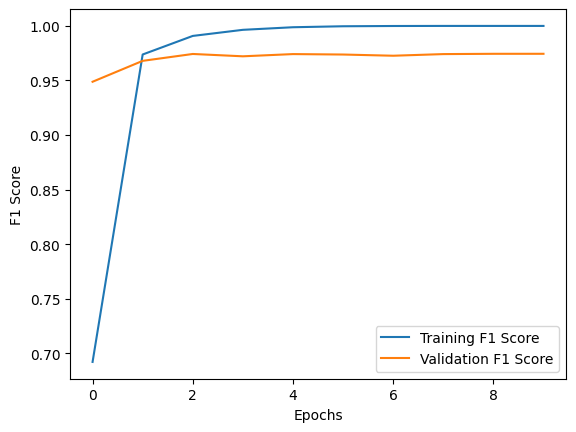

In [39]:
# Plot the training and validation F1 score
plt.plot(training_history.history['f1_score'], label='Training F1 Score')
plt.plot(training_history.history['val_f1_score'], label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

The evaluation assesses the performance of different classification models based on metrics like Accuracy, Precision, Recall, and F1 Score. While Gaussian, Multinomial, and Bernoulli Naive Bayes, Decision Tree, and Random Forest show respectable results, they have inherent limitations. For example, Naive Bayes assumes feature independence, which may not hold in all cases, and Decision Trees can overfit complex datasets. Although Random Forest is robust, it may not be optimal for high-dimensional data. In contrast, Support Vector Machine (SVM) emerges as the preferred choice due to its exceptional accuracy, balanced performance across metrics, robustness to overfitting, and capacity to handle high-dimensional data effectively. SVM's ability to capture complex relationships and maximize margins further solidifies its superiority, making it the ideal model for this classification task.

# 6. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter ranges
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

# Initialize the SVC
svm = SVC()

# Initialize the GridSearchCV
grid = GridSearchCV(svm, param_grid, refit=True, verbose=2)

# Fit the GridSearchCV with original labels
grid.fit(X_train_over, y_train_over.argmax(axis=1))

# Get the best estimator
svm_tuned = grid.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  27.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  26.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  26.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  27.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  27.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  31.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  30.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  30.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  30.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  30.5s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  32.8s
[CV] END ......................C=0.1, gamma=0.01

In [46]:
svm_tuned

SVC(C=10, gamma=1)

The SVM model was fine-tuned using Grid Search, which systematically explores different combinations of hyperparameters to find the optimal configuration. The specified parameters included 'C', controlling the regularization strength, and 'gamma', determining the influence of individual training samples. The 'kernel' parameter was set to 'rbf', indicating the radial basis function kernel.

After evaluating all combinations, the grid search identified the best model configuration where 'C' was set to 10 and 'gamma' to 1. This configuration achieved the highest performance, indicating that a regularization strength of 10 and a higher influence of individual training samples (gamma = 1) resulted in the most accurate classification of the Uber Eats reviews.

# 7. Validation with test Dataset <a id='validation'></a>

[Back to top](#table_of_contents)

In [47]:
df_test = pd.read_csv('cleaned_data.csv')
df_test

,stars,cleaned_text,sentiment
0,1,"['lately', 'common', 'wait', 'hour', 'food', '...",negative
1,5,"['love', 'great', 'offer', 'good', 'selection'...",positive
2,1,"['disappointed', 'app', 'used', 'long', 'time'...",negative
3,2,"['fairly', 'easy', 'use', 'trying', 'find', 'h...",negative
4,4,"['like', 'fact', 'u', 'ca', 'get', 'refund', '...",positive
...,...,...,...
8892,5,"['food', 'good', 'delivery', 'took', 'forever'...",positive
8893,1,"['whenever', 'never', 'sent', 'correct', 'item...",negative
8894,1,"['delivery', 'driver', 'turn', 'incorrect', 'l...",negative
8895,5,"['great', 'deal', 'buddy', 'pizza', 'buy', 'on...",positive


In [48]:
# convert string representations of lists in 'cleaned_text' back to actual lists
df_test['cleaned_text_list'] = df['cleaned_text'].apply(ast.literal_eval)

# convert lists in 'cleaned_text_list' to strings
df_test['cleaned_text_str'] = df['cleaned_text_list'].apply(' '.join)

In [49]:
# initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [50]:
# convert 'cleaned_text_str' into TF-IDF vectors
X_val = vectorizer.fit_transform(df_test['cleaned_text_str'])

# use 'sentiment' as target
y_val = df_test['sentiment']

In [51]:
# Use the SVM model to make predictions
df_test['predicted_sentiment'] = svm_tuned.predict(X_val)

In [58]:
df_test.head()

,stars,cleaned_text,sentiment,cleaned_text_list,cleaned_text_str,predicted_sentiment
0,1,"['lately', 'common', 'wait', 'hour', 'food', '...",negative,"[lately, common, wait, hour, food, passed, dri...",lately common wait hour food passed driver one...,0
1,5,"['love', 'great', 'offer', 'good', 'selection'...",positive,"[love, great, offer, good, selection, food, sh...",love great offer good selection food shopping ...,2
2,1,"['disappointed', 'app', 'used', 'long', 'time'...",negative,"[disappointed, app, used, long, time, service,...",disappointed app used long time service fee ke...,0
3,2,"['fairly', 'easy', 'use', 'trying', 'find', 'h...",negative,"[fairly, easy, use, trying, find, happening, c...",fairly easy use trying find happening contacti...,0
4,4,"['like', 'fact', 'u', 'ca', 'get', 'refund', '...",positive,"[like, fact, u, ca, get, refund, unless, u, ta...",like fact u ca get refund unless u take pictur...,2


In [59]:
# Map the sentiments to the same encoding as predicted_sentiment
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df_test['sentiment_encoded'] = df_test['sentiment'].map(sentiment_mapping)
df_test.head()

,stars,cleaned_text,sentiment,cleaned_text_list,cleaned_text_str,predicted_sentiment,sentiment_encoded
0,1,"['lately', 'common', 'wait', 'hour', 'food', '...",negative,"[lately, common, wait, hour, food, passed, dri...",lately common wait hour food passed driver one...,0,0
1,5,"['love', 'great', 'offer', 'good', 'selection'...",positive,"[love, great, offer, good, selection, food, sh...",love great offer good selection food shopping ...,2,2
2,1,"['disappointed', 'app', 'used', 'long', 'time'...",negative,"[disappointed, app, used, long, time, service,...",disappointed app used long time service fee ke...,0,0
3,2,"['fairly', 'easy', 'use', 'trying', 'find', 'h...",negative,"[fairly, easy, use, trying, find, happening, c...",fairly easy use trying find happening contacti...,0,0
4,4,"['like', 'fact', 'u', 'ca', 'get', 'refund', '...",positive,"[like, fact, u, ca, get, refund, unless, u, ta...",like fact u ca get refund unless u take pictur...,2,2


In [61]:
# Calculate the accuracy
accuracy = accuracy_score(df_test['sentiment_encoded'], df_test['predicted_sentiment'])
print(f'Accuracy: {accuracy}')

Accuracy: 0.9946049230077554


In [65]:
# Calculate the F1 score
f1 = f1_score(df_test['sentiment_encoded'], df_test['predicted_sentiment'], average='weighted')
print('F1 Score:', f1)

F1 Score: 0.9946101568430482


In [66]:
# Calculate the recall
recall = recall_score(df_test['sentiment_encoded'], df_test['predicted_sentiment'], average='weighted')
print('Recall:', recall)

Recall: 0.9946049230077554


In [68]:
precision = precision_score(df_test['sentiment_encoded'], df_test['predicted_sentiment'], average='weighted')
print('Precision:', precision)

Precision: 0.9946250792727017


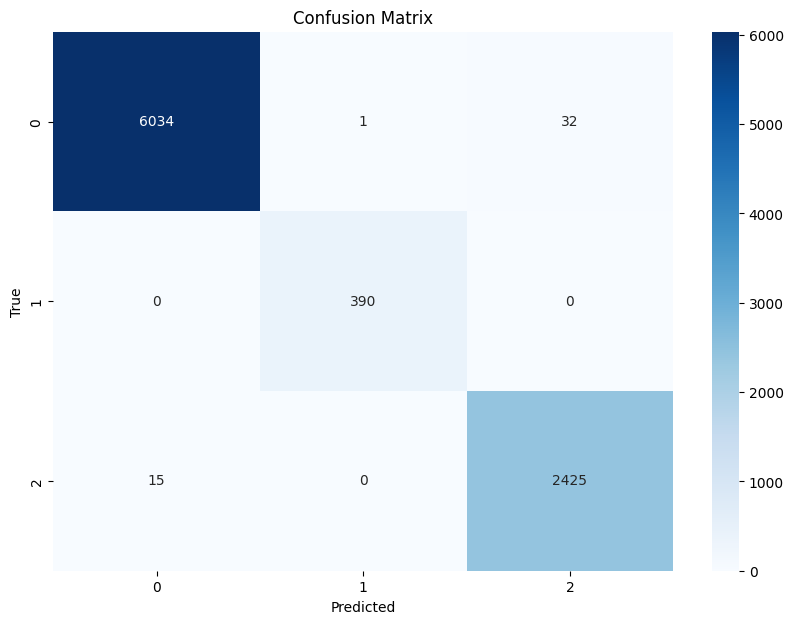

In [69]:
confusion = confusion_matrix(df_test['sentiment_encoded'], df_test['predicted_sentiment'])

plt.figure(figsize=(10,7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

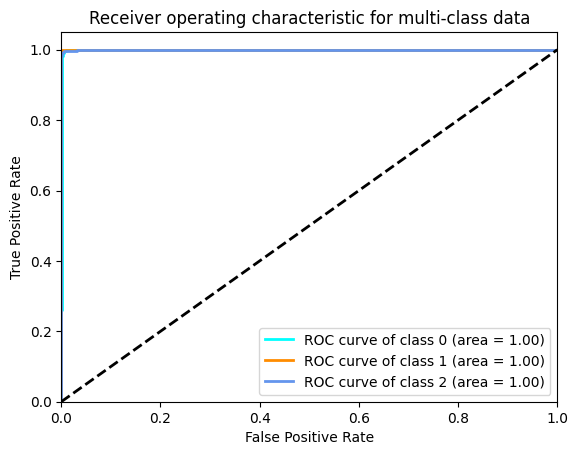

In [72]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Binarize the output
y = label_binarize(df_test['sentiment_encoded'], classes=[0, 1, 2])
n_classes = y.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm_tuned)
y_score = classifier.fit(X_train_over, y_train_over).decision_function(X_val)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define colors for the different classes
colors = ['aqua', 'darkorange', 'cornflowerblue']

# Plot all ROC curves
plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()